# Advent of Code 2019


My Solutions to 2019 Advent of Code (http://adventofcode.com) in Python.

They may not be all perfect but they work!

In [707]:
import math
import numpy as np
import operator
from collections import Counter
from collections import defaultdict
import re
import copy
from math import gcd
import importlib

import numpy as np
import matplotlib.pyplot as plt

import intcode_computer as ic

Quick function for loading files

In [5]:
def load_data(day):
    filename = "input/"+ day + "-input.txt"

    try:
        return open(filename)
    except FileNotFoundError:
        print("Failed to load file")

## Day 1- The Tyranny of the Rocket Equation

#### Part 1

Pretty straight forward.  Load file for each module divide by 3 rounding down, subtract 2, and add to total sum.

In [6]:
def fuel_counter(modules):
    modules = [int(i) for i in modules.split('\n') if i != ""]
    total = 0
    
    for module in modules:
        total += math.floor(module/3) - 2
            
    return total

#test
assert fuel_counter("12") == 2
assert fuel_counter("14") == 2
assert fuel_counter("1969") == 654
assert fuel_counter("100756") ==33583
fuel_counter(load_data("day1").read())

3372756

#### Part 2

Adjust to repeat dividing by 3, rounding down, and subtracting 2 until fuel cost is zero or below.

In [7]:
def fuel_counter2(modules):
    modules = [int(i) for i in modules.split('\n') if i != ""]
    total = 0
    
    for module in modules:
        
        while module >= 0:
            fuel = math.floor(module/3) - 2
            
            if fuel > 0:
                total += fuel
                
            module = fuel
            
    return total

#test
assert fuel_counter2("14") == 2
assert fuel_counter2("1969") == 966
assert fuel_counter2("100756") ==50346
fuel_counter2(load_data("day1").read())

5056279

## Day 2 - 1202 Program Alarm 

#### Part 1

Implement the opcode program with an option to replace the initial noun and verb.

In [8]:
def gravity_assist(opcodes, noun, verb):
    opcodes = [int(i) for i in opcodes.split(',')]
    
    #restore values

    opcodes[1] = noun
    opcodes[2] = verb
    
    head = 0
    
    while head < len(opcodes):

        if opcodes[head] == 99:
            break
            
        elif opcodes[head] == 1:
            opcodes[opcodes[head + 3]] = opcodes[opcodes[head + 1]] + opcodes[opcodes[head + 2]]
            
        elif opcodes[head] == 2:
            opcodes[opcodes[head + 3]] = opcodes[opcodes[head + 1]] * opcodes[opcodes[head + 2]]
            
        head += 4

    return opcodes[0]

assert gravity_assist("1,0,0,0,99",0,0) == 2
assert gravity_assist("2,3,0,3,99",3,0) == 2
assert gravity_assist("2,4,4,5,99,0",4,4) == 2
assert gravity_assist("1,1,1,4,99,5,6,0,99",1,1) == 30
assert gravity_assist("1,9,10,3,2,3,11,0,99,30,40,50",9,10) == 3500

#answer
gravity_assist(load_data("day2").read(), 12,2)

3706713

#### Part 2

Cheated a bit here.  Fastest solution was to increment noun and verb and see impact on output.  Found incrementing each had an independent step size making it easy to manually find a solution for the target value.

In [9]:
assert gravity_assist(load_data("day2").read(), 86, 9) == 19690720

#answer
print(str(100 * 86 + 9))

8609


## Day 3 - Crossed Wires

#### Part 1

The approach is to build a set of points for wire1 and wire2 representing the paths of each wire.  We can then find the common points in the two sets and determine which is closest to the central port (0,0).

In [10]:
#build up a set of points for the wire path based on the wire vectors
def get_wire_points(path):
    
    points = set()
    loc = (0,0)
    
    for seg in path:
        direction = seg[0]
        mag = int(seg[1:])
        
        for i in range(mag):
            x,y = loc
            
            if direction == 'R':
                x+=1
            elif direction == 'L':
                x-=1
            elif direction == 'U':
                y+= 1
            elif direction == 'D':
                y-=1
                
            loc = (x,y)
            
            points.add(loc)
        
    return points

#Find common points between two wires and find the closest to the central port
def wire_intersect(paths):
    wire1, wire2 = paths.split('\n')[:-1]
    
    wire1 = wire1.split(",")
    wire2 = wire2.split(",")
    
    wire1_set = get_wire_points(wire1)
    wire2_set = get_wire_points(wire2)
    
    intersections = wire1_set.intersection(wire2_set)
    
    closest_distance = float("Inf")
    
    for intersection in intersections:
        if (abs(intersection[0]) + abs(intersection[1])) < closest_distance:
            closest_distance = (abs(intersection[0]) + abs(intersection[1]))

    return closest_distance

wire_intersect(load_data("day3").read())

2193

#### Part 2

Number of steps by the wires now matters.  Use a dictionary where the keys are each point a wire travels and the values are the minimum number of steps to that point.  Find the intersection of the two wires with the smallest number of total steps.

In [11]:
#build up a set of points for the wire path based on the wire vectors
#use a hash table and count steps taken to reach point
def get_wire_points_hash(path):
    
    points = {}
    loc = (0,0)
    steps = 0
    
    for seg in path:
        direction = seg[0]
        mag = int(seg[1:])
        
        for i in range(mag):
            x,y = loc
            
            if direction == 'R':
                x+=1
            elif direction == 'L':
                x-=1
            elif direction == 'U':
                y+= 1
            elif direction == 'D':
                y-=1
                
            loc = (x,y)
            steps += 1
            
            if loc not in points:
                points[loc] = steps
        
    return points

#Find common points between two wires and find the closest to the central port
def wire_intersect_hash(paths):
    wire1, wire2 = paths.split('\n')[:-1]
    
    wire1 = wire1.split(",")
    wire2 = wire2.split(",")
    
    wire1_dict = get_wire_points_hash(wire1)
    wire2_dict = get_wire_points_hash(wire2)
    
    intersections = set(wire1_dict.keys()).intersection(wire2_dict.keys())
    
    closest_distance = float("Inf")
    
    for intersection in intersections:
        if (wire1_dict[intersection] + wire2_dict[intersection]) < closest_distance:
            closest_distance = wire1_dict[intersection] + wire2_dict[intersection]

    return closest_distance

wire_intersect_hash(load_data("day3").read())

63526

## Day 4 - Secure Container

#### Part 1

Brute force through combinations.  Check for at least one repeated double and confirm no value is less that the value before it.

If range was larger could have solved using a recursive solution.

In [12]:
def password_count(low, high):
    passwords = 0
    
    for pw in range(low, high + 1):
        pw_str = '0' + str(pw) + '0'
        valid = False
        
        for i in range(1,len(pw_str) - 1):
            
            if pw_str[i] < pw_str[i - 1]:
                valid = False
                break
                
            elif pw_str[i] ==  pw_str[i + 1]:
                valid = True
            
        if valid:
            passwords += 1
            
    return passwords

password_count(165432, 707912)

1716

#### Part 2

Modify to make sure at least one repeated set of numbers isn't part of a triplet which would disqualify the combination.

In [13]:
def password_count2(low, high):
    passwords = 0
    p = []
    
    for pw in range(low, high + 1):
        pw_str = '0' + str(pw) + '00'
        valid = False
        
        for i in range(1,len(pw_str) - 2):
            
            if pw_str[i] < pw_str[i - 1]:
                valid = False
                break
                
            elif pw_str[i] ==  pw_str[i + 1] and pw_str[i + 1] != pw_str[i + 2] and pw_str[i] != pw_str[i-1]:
                valid = True
            
        if valid:
            passwords += 1
            
    return passwords

password_count2(165432, 707912)

1163

## Day 5 - Sunny with a Chance of Asteroids

#### Part 1 & 2

Update the intcode computer with the new commands and run the updated computer.

In [22]:
#create computer
test_computer = ic.intcode_computer(load_data("day5").read())

#answer
print("Output: " + test_computer.run([1]))

while test_computer.getInstruct() != 99:
    print("Output: " + test_computer.run())

Loaded computer of length: 678
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 0
Output: 7286649


## Day 6 - Universal Orbit Map

#### Part 1

First build up an adjacency list describing the orbit network.  We can then traverse the network using DFS to find the number of orbits.

In [23]:
def orbit_checksum(orbits):
    orbits = [i for i in orbits.split('\n')[:-1]]
    adj = {}

    #build up adj list for orbits analysis
    for orbit in orbits:
        centre, orbiter = orbit.split(')')
        if centre in adj:
            adj[centre] = adj[centre]+ [orbiter]
            
        else:
            adj[centre] = [orbiter]
            
    #answer for total orbits
    answer = 0
    
    stack = [['COM', 0]]
        
    while stack:
        planet, depth = stack.pop(0)
        
        #if planet is at a terminus add depth
        answer += depth
        
        if planet not in adj:
            continue
        
        else:
            #add to stack planets orbiting the planet
            for p2 in adj[planet]:
                stack.append([p2, depth + 1])
            
    return answer
        
    
    
    
#answer
assert orbit_checksum(load_data("day6test").read()) == 42
orbit_checksum(load_data("day6").read())

308790

#### Part 2

Traverse the network to find the shortest distance between us and Santa.

In [24]:
def orbit_distance(orbits):
    orbits = [i for i in orbits.split('\n')[:-1]]
    adj = {}

    #build up adj list for orbits analysis
    for orbit in orbits:
        centre, orbiter = orbit.split(')')
        
        if centre in adj:
            adj[centre] = adj[centre]+ [orbiter]
            
        else:
            adj[centre] = [orbiter]
            
        
        if orbiter in adj:
            adj[orbiter] = adj[orbiter] + [centre]
            
        else:
            adj[orbiter] = [centre]
            
    
    stack = [['YOU', 0]]
    visited = set()
    answer = float('Inf')
        
    while stack:
        planet, depth = stack.pop(0)
        visited.add(planet)
        
        if planet == 'SAN':
            answer = min(answer,depth)

        #add to stack planets orbiting the planet
        for p2 in adj[planet]:
            if p2 not in visited:
                stack.append([p2, depth + 1])
            
    return answer - 2

orbit_distance(load_data("day6").read())

472

## Day 7 - Amplification Circuit

#### Part 1

In [2370]:
#generate all permutations for phase settings
def phase_permutations(vals):
    
    stack = [[[],vals]]
    answer = []
    
    while stack:
        perm, nums = stack.pop(0)
        
        if not nums:
            answer.append(perm)
            continue
        
        for num in nums:
            temp_perm = perm[:]
            temp_num = nums[:]
                    
            temp_perm.append(num)
            temp_num.remove(num)
            stack.append([temp_perm,temp_num])
            
    return answer

In [2371]:
#part one solution
def solve_amplifiers(permutations, opcodes):
    answer = float("-Inf")

    for permutation in permutations:
        output = 0

        for phase in permutation:
            test_computer_amp = ic.intcode_computer(opcodes)
            output = int(test_computer_amp.run([phase, output]))
   
        answer = max(answer, output)
        
    return answer

solve_amplifiers(phase_permutations([0,1,2,3,4]), load_data("day7").read())

30940

#### Part 2

This one got tricky since we need to maintain the state of each amplifier as the signal loops through the amplifier array.  I had to create an amplifier object for each amplifier to track the state of each amplifier.

In [2372]:
#part one solution
def solve_amplifiers2(permutations, opcodes):
    answer = float("-Inf")
    
    for permutation in permutations:
        amp_arr = []
        
        amp_arr.append(ic.intcode_computer(opcodes))
        amp_arr[-1].run([permutation[0]])
        
        amp_arr.append(ic.intcode_computer(opcodes))
        amp_arr[-1].run([permutation[1]])
        
        amp_arr.append(ic.intcode_computer(opcodes))
        amp_arr[-1].run([permutation[2]])
        
        amp_arr.append(ic.intcode_computer(opcodes))
        amp_arr[-1].run([permutation[3]])
        
        amp_arr.append(ic.intcode_computer(opcodes))
        amp_arr[-1].run([permutation[4]])
        
        output = 0
        e_signal = 0
        
        while output != None:
            for amp in amp_arr:
                
                output = amp.run([output]) 
                
                if output:
                    output = int(output)
                    
                else:
                    break
                    
            if output:    
                e_signal = max(output, e_signal) 

        answer = max(answer, e_signal)
        
    return answer

solve_amplifiers2(phase_permutations([5,6,7,8,9]), load_data("day7").read())

76211147

## Day 8 - Space Image Format

#### Part 1

Go through each pixel one by one to build up image layers.  Then find the layer that has the most zeros to satisfy the checksum to ensure the image is not corrupted.

In [58]:
def build_layers(pixels, x, y):
    pixels = pixels[:-1]
    layer_count = int(len(pixels)/(x*y))

    layers = [[[0 for _ in range(x)] for _ in range(y)] for _ in range(layer_count)]
    
    for i in range(len(pixels)):
        layer = i//(x*y)
        row = (i - (layer * y* x)) // x
        col = (i - (layer * y* x)) % x
        
        layers[layer][row][col]  = int(pixels[i])
    
    
    return layers

def check_corruption(layers):
    min_zeros = float("Inf")
    min_multi = 0
    
    for layer in layers:
        counts = [0,0,0]
        
        for row in layer:
            for pixel in row:
                counts[pixel] += 1
                
        if counts[0] < min_zeros:
            min_zeros = counts[0]
            min_multi = counts[1] * counts[2]
                
            
    
    return min_multi

layers = build_layers(load_data("day8").read(), 25, 6)

check_corruption(layers)

2806

#### Part 2

Flatten layers into a single image based on 2 = transparent, 1 = black, 0 = white.

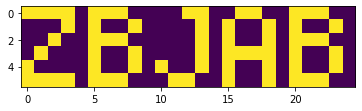

In [59]:
def flatten_image(layers):
    image = layers[0]
    
    for layer in layers[1:]:
        for i in range(len(image)):
            for j in range(len(image[0])):
                
                if image[i][j] == 2:
                    image[i][j] = layer[i][j]
                    
    return image

image = flatten_image(layers)
array = np.array(image, dtype=np.uint8)

plt.imshow(array,interpolation='nearest')
plt.show()

## Day 9 - Sensor Boost

#### Part 1 & Part 2

In [63]:
#test program 1
test1 = ic.intcode_computer('109,1,204,-1,1001,100,1,100,1008,100,16,101,1006,101,0,99')
print("Output: " + test1.run())

Loaded computer of length: 16
Output: 109


In [61]:
#test program 2
test2 = ic.intcode_computer('1102,34915192,34915192,7,4,7,99,0')
print("Output: " + test2.run())

Loaded computer of length: 8


'1219070632396864'

In [64]:
#test program 3
test3 = ic.intcode_computer('104,1125899906842624,99')
print("Output: " + test3.run())

Loaded computer of length: 3
Output: 1125899906842624


In [67]:
#Part 1 answer with input 1
comp = ic.intcode_computer(load_data("day9").read())
print("Output: " + comp.run([1]))

Loaded computer of length: 973
Output: 3409270027


In [68]:
#Part 1 answer with input 2
comp = ic.intcode_computer(load_data("day9").read())
print("Output: " + comp.run([2]))

Loaded computer of length: 973
Output: 82760


## Day 10 - Monitoring Station

#### Part 1

Iterate through each asteroid selecting one as a candidates for the station.  Simplify each pair of vectors to their lowest common denominator. Find the asteroid with the most unique simplified vectors for the station.

In [69]:
#simplify to common denominator
def simplify_coord(coord):
    
    if coord[0] == 0 and coord[1] == 0:
        return (0,0)
    
    elif coord[0] == 0:
        return (0,coord[1]/abs(coord[1]))
    
    elif coord[1] == 0:
        return (coord[0]/abs(coord[0]),0)
    
    else:
        gcd = math.gcd(coord[0],coord[1])
        return (coord[0]/gcd, coord[1]/gcd)

def detectable_astroids(data):
    rows = [i for i in data.split('\n') if i != ""]
    astroids = set()
    
    viewablity = {}
    
    for i,row in enumerate(rows):
        for j, location in enumerate(row):
            if location == '#':
                astroids.add((i,j))
                
                
    for astroid in astroids:
        visited_neighbour = set()
        cur_count= 0
        
        for neighbour in astroids:
            
            #if same astroid
            if astroid == neighbour:
                continue
                
            diff = (astroid[0] - neighbour[0], astroid[1] - neighbour[1])
            diff_simplified = simplify_coord(diff)
            
            if diff_simplified not in visited_neighbour:
                cur_count += 1
                visited_neighbour.add(diff_simplified)
                
        viewablity[astroid]  = cur_count
                
    best = -float('Inf')
    loc = []
    
    for a in viewablity:
        if viewablity[a] > best:
            best = viewablity[a]
            loc = a
        
    return [best, loc]

print((detectable_astroids(load_data("day10").read())))

[347, (36, 26)]


#### Part 2

Tricky!  Start by converting coordinates from Cartesian to polar with the 'station' as the origin.  Then adjust to define 0 degrees in the polar coordinates to be vertical.

In [70]:
def laser_astroids(data, station):
    #build up astroid list by angle
    rows = [i for i in data.split('\n') if i != ""]
    astroids = set()
    
    astroid_angles = defaultdict(list)
    
    for i,row in enumerate(rows):
        for j, location in enumerate(row):
            if location == '#':
                astroids.add((i,j))
                
    for neighbour in astroids:
            
        #if same astroid
        if station == neighbour:
            continue

        diff = (station[0] - neighbour[0], station[1] - neighbour[1])
        
        distance = np.sqrt((diff[0]**2 + diff[1]**2))
        angle = np.arctan2(diff[0], diff[1]) - math.pi/2
        
        if angle < 0:
            angle += 2 * math.pi
        
        astroid_angles[angle].append([neighbour, distance])
        
    #sort each angle by distance from station
    for angle in astroid_angles:
        astroid_angles[angle] = sorted(astroid_angles[angle], key= lambda x: x[1])
        
    count = 0
    
    while count < 200:
        
        for angle in sorted(astroid_angles.keys()):
            
            if astroid_angles[angle]:
                destroyed = astroid_angles[angle].pop(0)
                count += 1
            if count == 200:
                break
            
    return destroyed[0]

assert laser_astroids(load_data("day10test").read(), (13,11)) == (2,8)

laser_astroids(load_data("day10").read(), (36,26))

(29, 8)

## Day 11 - Space Police

#### Part 1

Reuse intcode computer again.  Track which coordinates the robot travels to and paints white.

In [71]:
robot = ic.intcode_computer(load_data("day11").read())

robot_coordinates = (0,0)
white_locations = set()
all_painted = set()

robot_dirs = [(0,1), (1,0), (0,-1), (-1,0)]
robot_dir = 0

Loaded computer of length: 624


In [72]:
while robot.getInstruct() != 99:
    
        if robot_coordinates in white_locations:
            output1 = robot.run([1])
        else:
            output1 = robot.run([0])
            
        output2 = robot.run()
        
        if output1 == '1':
            white_locations.add(robot_coordinates)
            all_painted.add(robot_coordinates)
            
        elif output1 == '0' and robot_coordinates in white_locations:
            white_locations.remove(robot_coordinates)
            
        
        if output2 == '0':
            robot_dir -= 1
            robot_dir %= 4
            
        else:
            robot_dir += 1
            robot_dir %= 4
            
        new_x = robot_coordinates[0] + robot_dirs[robot_dir][0]
        new_y = robot_coordinates[1] + robot_dirs[robot_dir][1]
        
        robot_coordinates = (new_x, new_y)

print(len(all_painted))

1964


#### Part 2

Start with robot starting on white and generate image of robot path.

Loaded computer of length: 624


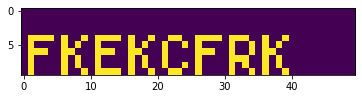

In [73]:
robot = ic.intcode_computer(load_data("day11").read())

robot_coordinates = (0,0)
white_locations = set()
white_locations.add((0,0))

robot_dirs = [(0,1), (1,0), (0,-1), (-1,0)]
robot_dir = 0

while robot.getInstruct() != 99:
    
        if robot_coordinates in white_locations:
            output1 = robot.run([1])
        else:
            output1 = robot.run([0])
            
        output2 = robot.run()
        
        if output1 == '1':
            white_locations.add(robot_coordinates)
            all_painted.add(robot_coordinates)
            
        elif output1 == '0' and robot_coordinates in white_locations:
            white_locations.remove(robot_coordinates)
            
        
        if output2 == '0':
            robot_dir -= 1
            robot_dir %= 4
            
        else:
            robot_dir += 1
            robot_dir %= 4
            
        new_x = robot_coordinates[0] + robot_dirs[robot_dir][0]
        new_y = robot_coordinates[1] + robot_dirs[robot_dir][1]
        
        robot_coordinates = (new_x, new_y)

image = [[0 for _ in range(50)] for _ in range(10)]
        
for l in white_locations:
    image[l[1] + 5][l[0]] = 1
    
array = np.array(image[::-1], dtype=np.uint8)

plt.imshow(array,interpolation='nearest')
plt.show()

## Day 12 - The N-Body Problem

#### Part 1

This was pretty straight forward.  For each cycle update the body velocity, then position, then repeat for the desired number of cycles.  Then calculate the total energy in the system to get the answer.

In [74]:
def n_body(positions, cycles = 1000):
    
    total_energy = 0
    
    ####
    #load input and parse to get each moons coordinates
    positions = positions.split('\n')[:-1]

    body_position = []
    body_velocity = []
    
    for position in positions:
        p_split = position.split(',')
        
        new_planet = []
        for c in p_split:
            new_planet.append(int(re.sub('[^-1234567890]', '', c)))
            
        body_position.append(new_planet)
        body_velocity.append([0,0,0])
        
    #print(body_position)
    #print(body_velocity)
        
    for cycle in range(cycles):
        
        #update velocitys comparing each pair
        for i in range(len(body_position)):
            for j in range(i+1, len(body_position)):
                for coord in range(3):
                
                    #update x
                    if body_position[i][coord] < body_position[j][coord]:
                        body_velocity[i][coord] += 1
                        body_velocity[j][coord] -= 1

                    elif body_position[i][coord] != body_position[j][coord]:
                        body_velocity[i][coord] -= 1
                        body_velocity[j][coord] += 1
                        
        #update positions comparing each pair
        for i in range(len(body_position)):
            body_position[i] = [sum(x) for x in zip(body_position[i], body_velocity[i])]
        
        #print("cycle: " + str(cycle + 1))
        #print(body_position)
        #print(body_velocity)
        
    #calculate the total energy
    for i in range(len(body_position)):
        pot = sum([abs(i) for i in body_position[i]])
        kin = sum([abs(i) for i in body_velocity[i]])
        
        total_energy += pot * kin
        
    return total_energy

assert n_body(load_data("day12test").read(), 10) == 179
assert n_body(load_data("day12test2").read(), 100) == 1940

n_body(load_data("day12").read(), 1000)

8742

#### Part 2

Wow this was tough!  The trick was that each axis is independent (ie x, y ,z).  For each axis we can determine the number of cycles until the axis has returned to the starting point.  We then find the lowest common multiple of each axis phase to get the phase of the entire system.

In [77]:
def n_body_phase(positions, coord = 0 ):
    
    ####
    #load input and parse to get each moons coordinates
    positions = positions.split('\n')[:-1]

    body_position = []
    body_velocity = []
    phases = []
    
    for position in positions:
        p_split = position.split(',')
        
        new_planet = []
        for c in p_split:
            new_planet.append(int(re.sub('[^-1234567890]', '', c)))
            
        body_position.append(new_planet[coord])
        body_velocity.append(0)
        phases.append(float("Inf"))
    
    starting_positions = copy.deepcopy(body_position)
    
    cycle = 0   
    while float("Inf") in phases:
        
        #update velocitys comparing each pair
        for i in range(len(body_position)):
            for j in range(i+1, len(body_position)):
                
                    #update x
                    if body_position[i] < body_position[j]:
                        body_velocity[i] += 1
                        body_velocity[j] -= 1

                    elif body_position[i] != body_position[j]:
                        body_velocity[i] -= 1
                        body_velocity[j] += 1
                        
        #update positions comparing each pair
        body_position = [sum(x) for x in zip(body_position, body_velocity)]
        
        #check if body has completed a phase
        if sum(body_velocity) == 0 and body_position == starting_positions:
            return cycle + 2
                
        cycle += 1

In [78]:
#calculate the x, y, and z phases of each planet

phase_x = n_body_phase(load_data("day12").read(),0)
phase_y = n_body_phase(load_data("day12").read(),1)
phase_z = n_body_phase(load_data("day12").read(),2)

np.lcm.reduce([phase_x, phase_y, phase_z])

325433763467176

## Day 13 - Care Package

#### Part 1

In [79]:
game = ic.intcode_computer(load_data("day13").read())

Loaded computer of length: 2720


In [80]:
output = []

while game.getInstruct() != 99:
    o = game.run()
    
    if o:
        output.append(int(o))
    

In [81]:
ans = 0
max_x = -2
max_y = -2

for i in range(2, len(output),3):
    if output[i] == 2:
        ans += 1
        
    max_x = max(max_x, output[i-2])
    max_y = max(max_y, output[i-1])
        
print("Total blocks: " + str(ans))
print("Screen x-size: " + str(max_x))
print("Screen y-size: " + str(max_y))

Total blocks: 432
Screen x-size: 39
Screen y-size: 25


#### Part 2

Another interesting question!  I added a function to render an array of the screen using the raw opcode program output.  The AI to play the game was quite simple.  Just always move the paddle in the direction of the ball.  If the ball and paddle are aligned leave it.

In [82]:
def render_screen(screen, output, max_x, max_y):
    
    #array for screen
    score = -1
    paddle = [-1,-1]
    ball = [-1,-1]
    
    for i in range(2, len(output),3):
        x = output[i - 2]
        y = output[i - 1]
        ptype = output[i]
        
        if x != -1:
            #if nothing
            if ptype == 0:
                screen[y][x] = 0

            #wall    
            elif ptype == 1:
                screen[y][x] = 1

            #block   
            elif ptype == 2:
                screen[y][x] = 2

            #paddle   
            elif ptype == 3:
                screen[y][x] = 3
                paddle = [x,y]

            #ball 
            elif ptype == 4:
                screen[y][x] = 4
                ball = [x,y]
                
        else:
            score = ptype      
    return [screen, score, paddle, ball]

Loaded computer of length: 2720


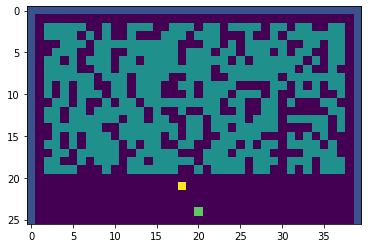

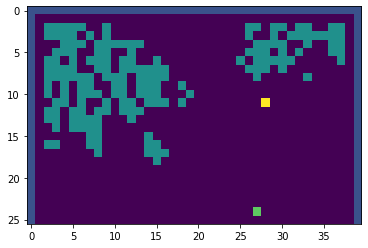

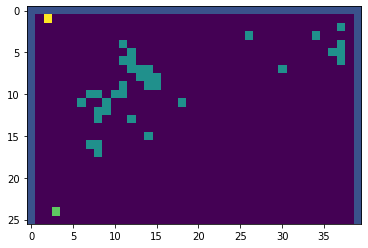

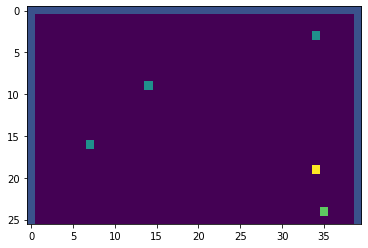

Final score was:  22225


In [84]:
game = ic.intcode_computer(load_data("day13").read())
score = 0

#put game into play mode
game.setMemory(0,2)

#array for screen
screen = [[0 for _ in range(max_x + 1)] for _ in range(max_y + 1)]

raw_output = []

cycles = 0
while game.getInstruct() != 99:
    
    #if not waiting for input keep running to get output
    if game.getInstruct() != 3:
        output = game.run()
            
    elif game.getInstruct() == 3:
        screen, new_score, paddle, ball = render_screen(screen, raw_output, max_x, max_y)
        raw_output = []
        
        if new_score != -1:
            score = new_score
            #print(score)
        
        #print screen every 2000 cycles to make sure everything is working
        if cycles % 2000 == 0:
            array = np.array(screen, dtype=np.uint8)
            plt.imshow(array,interpolation='nearest')
            plt.show()
        
        if ball[0] < paddle[0]:
            output = game.run(['-1'])
            
        elif ball[0] == paddle[0]:
            output = game.run(['0'])
            
        else:
            output = game.run(['1'])
            
        cycles += 1
            
    
    if output:
        raw_output.append(int(output))
        
        
#final screen update
screen, new_score, paddle, ball = render_screen(screen, raw_output, max_x, max_y)
print("Final score was: ", str(new_score))

## Day 14 - Space Stoichiometry

#### Part 1

First the formulas need to be loaded into an easily accessible hash table.  For each material it's input materials, input material quantity, and the output quantity is stored in hash table.

A backwards BFS is performed starting with the final FUEL output until we work back to an ORE input.  One trick is to store excess material from each step in the BFS.  At each step if excess material is needed it is used before new material is produced. 

In [85]:
#load in formuals data into a hash table
def process_formulas(equations):
    #######################
    #parse data
    equations = equations.split('\n')[:-1]
    
    #formula lookup
    formulas  = {}
    
    for equation in equations:
        left, right = equation.split('=>')
        
        #process right side of equation
        right = right.strip()
        right_val, right_chem = right.split(" ")
        right_val = int(right_val)
        
        #process left side of equation
        left_chem = []
        left_val = []
        
        left = left.split(",")
        
        for l in left:
            l = l.strip()
            l_val, l_chem = l.split(" ")
            l_val = int(l_val)
            
            left_chem.append(l_chem)
            left_val.append(l_val)
            
        #store in hash
        formulas[right_chem] = [left_val,left_chem, right_val]
        
    return formulas

In [86]:
def stoich(equations, fuel_count = 1):
    
    #load data
    formulas = process_formulas(equations)
    
    
    #initial inputs
    inputs = defaultdict(int)
    excess = defaultdict(int)
    
    stack = [['FUEL', fuel_count]]
    ans = 0
    while stack:
        material, count = stack.pop(-1)
        
        #if ore is only input
        if material == 'ORE':
            ans += count
            continue
            
        elif count == 0:
            continue
            
        elif excess[material] > 0:    
            if excess[material] >= count:
                excess[material] -= count
                count = 0
            else:
                count -= excess[material]
                excess[material] = 0
            
        #reactions required
        reactions = int(math.ceil(count / formulas[material][2]))
        
        if reactions * formulas[material][2] > count:
            excess[material] += (reactions * formulas[material][2]) - count
        
        for i in range(len(formulas[material][1])):
            stack.append([formulas[material][1][i], formulas[material][0][i] * reactions])
            
    
    return ans

assert stoich(load_data("day14test").read()) == 13312
assert stoich(load_data("day14test2").read()) == 180697
assert stoich(load_data("day14test3").read()) == 2210736
print(stoich(load_data("day14").read()))

907302


#### Part 2

This becomes a simply binary search to see the largest possible fuel input that uses under 1 trillion ore.

In [87]:
#use binary search to find optimal number of fuel to use 1 trillion ore
hi = 2000000
lo = 1

target = 1000000000000

while lo <= hi:
    mid = (lo + hi) // 2
    
    fuel = stoich(load_data("day14").read(),mid)
    
    if fuel == target:
        break
        
    elif fuel < target:
        lo = mid + 1
        
    else:
        hi = mid - 1
        
print(str(mid) + " fuel is produced")   

1670299 fuel is produced


## Day 15- Oxygen System

#### Part 1 & 2

First step is to have the robot traverse the entire path to map it out.  We can use a DFS search to travel through the maze. If we reach a dead-end we backtrack the path until we find a new branch.  If we fully backtrack with no new branches we are completed mapping the maze.  We can use BFS to find the smallest distance from the robot starting point to the oxygen source.

For part 2 we use BFS and see how many steps it takes the traverse the entire maze starting at the oxygen source.

In [377]:
#function to get robot to fully explore coridoors
def robot_explore(repair_droid):
    visited = set([(0,0)])

    map_vals = {}
    map_vals[0] = set()
    map_vals[1] = set([(0,0)])
    map_vals[2] = set()
    map_vals[3] = []

    shortest_path = float("Inf")

    path = []

    #x,y position of robot
    cur_pos = (0,0)

    cycle = 0

    while True:
        #try north
        if (cur_pos[0], cur_pos[1] + 1) not in visited:
            new_pos = (cur_pos[0], cur_pos[1] + 1)
            path_rev = 2
            output = int(repair_droid.run(['1']))

        #try south    
        elif (cur_pos[0], cur_pos[1] - 1) not in visited:
            new_pos = (cur_pos[0], cur_pos[1] - 1)
            path_rev = 1
            output = int(repair_droid.run(['2']))

        #try east
        elif (cur_pos[0] + 1, cur_pos[1]) not in visited:
            new_pos = (cur_pos[0] + 1, cur_pos[1])
            path_rev = 3
            output = int(repair_droid.run(['4']))

        #try west    
        elif (cur_pos[0] - 1, cur_pos[1]) not in visited:
            new_pos = (cur_pos[0] - 1, cur_pos[1])
            path_rev = 4
            output = int(repair_droid.run(['3']))

        #if no options try to back track
        elif path:
            output = -99
            rev = path.pop(-1)

            if rev == 1:
                cur_pos = (cur_pos[0], cur_pos[1] + 1)

            elif rev == 2:
                cur_pos = (cur_pos[0], cur_pos[1] - 1)

            elif rev == 3:
                cur_pos = (cur_pos[0] - 1, cur_pos[1])

            elif rev == 4:
                cur_pos = (cur_pos[0] + 1, cur_pos[1])

            repair_droid.run([str(rev)])

        #if no backtrack option then break
        else:
            break

        #update data
        #if we moved update data
        if output == 1:

            path.append(path_rev)
            cur_pos = new_pos

            visited.add(cur_pos)
            map_vals[output].add(cur_pos)

        elif output == 2:
            path.append(path_rev)
            cur_pos = new_pos

            visited.add(cur_pos)
            map_vals[output].add(cur_pos)

            print(len(path))

        elif output == 0:
            visited.add(new_pos)
            map_vals[output].add(new_pos)


    return map_vals

In [378]:
#function build an array out of the know points in the cooridors
def plot_path(map_vals):
    #determine size
    x_min = float("Inf")
    x_max = -float("Inf")
    
    y_min = float("Inf")
    y_max = -float("Inf")
    
    for key in map_vals:
        for c in map_vals[key]:
            x_min = min(x_min, c[0])
            x_max = max(x_max, c[0])
    
            y_min = min(y_min, c[1])
            y_max = max(y_max, c[1])
            
    x_size = x_max + abs(x_min)
    y_size = y_max + abs(y_min)
    
    #print("x size: " + str(x_size))
    #print("y size: " + str(y_size))
    
    #create array
    img = [[0 for _ in range(x_size + 1)] for _ in range(y_size + 1)]
    
    
    for key in map_vals:
        for c in map_vals[key]:
            x,y = c
            x = x + abs(x_min)
            y = y + abs(y_min)
            
            img[x][y] = key + 1
            

    return [img, [abs(x_min), abs(y_min)]]
        

In [379]:
#run a bfs on the paths
def robot_bfs(c_arr, start_point, target_point = [-1,-1]):
    
    stack = [[start_point, 0]]
    target_distance = float('Inf')
    max_steps = -float('Inf')
    
    m = len(c_arr)
    n = len(c_arr[0])
    
    visited = set()
    
    target_point = tuple(target_point)
    
    while stack:
        point, steps = stack.pop(0)
        
        visited.add(tuple(point))
        
        max_steps = max(max_steps, steps)
        
        if point[0] == target_point[0] and point[1] == target_point[1]:
            target_distance = steps
        
        neighbours = [[point[0] + 1, point[1]],[point[0] - 1, point[1]],
                      [point[0], point[1] + 1],[point[0], point[1] - 1]]
        
        for neighbour in neighbours:
            if 0 <= neighbour[0] < m and 0 <= neighbour[1] < n:
                if c_arr[neighbour[0]][neighbour[1]] > 1 and tuple(neighbour) not in visited:
                    stack.append([neighbour, steps + 1])
    
    return [max_steps, target_distance]

Loaded computer of length: 1045
220


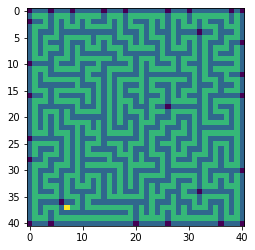

Source at: [37, 7]
Distance to source: 220
Oxygen spread time is: 334


In [380]:
#explore then convert to an array
map_vals = robot_explore(ic.intcode_computer(load_data("day15").read()))
c_arr, rob_start = plot_path(map_vals)

#plot out array
array = np.array(c_arr, dtype=np.uint8)
plt.imshow(array,interpolation='nearest')
plt.show()

#find oxygen source
for i in range(len(c_arr)):
    for j in range(len(c_arr[0])):
        if c_arr[i][j] == 3:
            oxy = [i,j]
            break
            
print("Source at: " + str(oxy))

total_steps, dist_source = robot_bfs(c_arr, rob_start, oxy)
print("Distance to source: " + str(dist_source))

total_steps, dist_source = robot_bfs(c_arr, oxy, rob_start)
print("Oxygen spread time is: " + str(total_steps))

## Day 16- Flawed Frequency Transmission

#### Part 1

Initial brute force solution with multiple nested for statements to solve.  Quite slow before increasing the message length 1000x.

In [503]:
def calc_fft(nums, pattern, phases):
    
    #convert numbers to list
    nums = [int(i) for i in nums]
    
    
    for phase in range(1, phases + 1):
        
        #temp for holding pattern
        new_nums = []
        
        for i in range(len(nums)):
            #generate phase
            phase_pattern = []
            new_num = 0
            phase_ptr = 1
            
            for p in pattern:
                for _ in range(i + 1):
                    phase_pattern.append(p)
            
            #calculate the new number
            for j in range(0, len(nums)):
                new_num += nums[j] * phase_pattern[phase_ptr]
                #print(str(nums[j]) + "* " + str(phase_pattern[phase_ptr]))
                phase_ptr += 1
                phase_ptr %= len(phase_pattern)
                    
            #print(new_num)
                
            #append 
            new_nums.append(int(str(abs(new_num))[-1]))
            
        nums = new_nums[:]
        #print(nums)
                
    nums = [str(i) for i in nums]
    nums = ''.join(nums)
        
    
    return nums

In [552]:
data = load_data("day16").read().split('\n')[0]

assert calc_fft('80871224585914546619083218645595', [0,1,0,-1], 100)[:8] == '24176176'
assert calc_fft('19617804207202209144916044189917', [0,1,0,-1], 100)[:8] == '73745418'
assert calc_fft('69317163492948606335995924319873', [0,1,0,-1], 100)[:8] == '52432133'

calc_fft(data, [0,1,0,-1], 100)[:8]

'82435530'

#### Part 2

Implemented a few tricks to speed up for a much longer input.  First was pre-calculating the sums up to each array index to speed up sums for each window.  Second was only calculating the phases after the input offset.  The further the offset is from the start the faster the calculation since everything before it can be ignored.

In [617]:
def calc_fft_optimized(nums, pattern, phases, offset = False):
    
    #convert numbers to list
    nums = [int(i) for i in nums]
    
    #true input
    if offset:
        offset = nums[0:7]
        offset = [str(i) for i in offset]
        offset = int(''.join(offset))
        nums = nums * 10000

    for phase in range(1, phases + 1):
        new_nums = []
        #print(phase)
        #calc dp
        nsum = 0
        dp = [0]
        
        #running sums
        for num in nums:
            nsum += num
            dp.append(nsum)
        
        for i in range(offset, len(nums)):
            
            new_num = 0
            pattern_ptr = 0
            num_ptr = 0
            
            while num_ptr < len(nums):
  
                window_size = i
                    
                window_end = min(num_ptr + window_size, len(nums))
                new_num += (dp[window_end] - dp[num_ptr]) * pattern[pattern_ptr]
                
                
                num_ptr += window_size
                
                pattern_ptr += 1
                pattern_ptr %= len(pattern)
                
                
                
            nums[i] = (int(str(abs(new_num))[-1]))
    
    nums = [str(i) for i in nums]
    nums = ''.join(nums)
    
    
    return nums[offset:(offset+8)]

In [611]:
assert calc_fft_optimized('03036732577212944063491565474664', [0,1,0,-1], 100, True) == '84462026'
assert calc_fft_optimized('02935109699940807407585447034323', [0,1,0,-1], 100, True) == '78725270'
assert calc_fft_optimized('03081770884921959731165446850517', [0,1,0,-1], 100, True) == '53553731'

In [619]:
data = load_data("day16").read().split('\n')[0]
ans = calc_fft_optimized(data, [0,1,0,-1], 100, True)
print("Signal is: " + ans)

Signal is: 83036156


## Day 17- Set and Forget

#### Part 1
The first half was pretty straight forward.  Run the intcode computer and collect all of it's output to get an image of the scaffolding path.

In [1241]:
#initalize the computer
importlib.reload(intcode_computer)
scaffold = ic.intcode_computer(load_data("day17").read())

Loaded computer of length: 1469


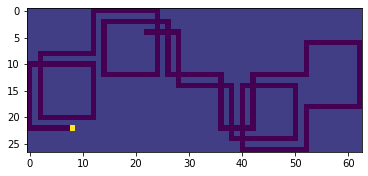

In [1242]:
#build up scaffold map
scaffold_map = []
new_line = []

while scaffold.getInstruct() != 99:
    next_c = scaffold.run()
    
    if next_c != '10' and next_c != None:
        new_line.append(int(next_c))
    
    elif next_c != None:
        scaffold_map.append(new_line)
        new_line = []

scaffold_map = scaffold_map[:-1]

#draw image of the scaffold
array = np.array(scaffold_map, dtype=np.uint8)
plt.imshow(array,interpolation='nearest')
plt.show()

In [1253]:
#calibrate camera by finding locations of scaffold intersections
def calc_intersections(scaffold_map):
    counter = 0
    
    for i in range(1, len(scaffold_map) - 1):
        for j in range(1, len(scaffold_map[0]) - 1):
            if scaffold_map[i][j] == 35 and scaffold_map[i + 1][j] == 35 and scaffold_map[i - 1][j] == 35 and scaffold_map[i][j - 1] == 35 and scaffold_map[i][j + 1] == 35:
                counter += (i * j)
                
    return counter

In [1254]:
print('Alignment parameters are: ' + str(calc_intersections(scaffold_map)) )
#print(scaffold_map)

Alignment parameters are: 4372


#### Part 2

Really tough!  One trick was to make sure the robot always has the same behavior at intersections to allow for the path to repeat/be compressed.  In this case I always made the robot continue forward if possible.

In this case once I found the path I manually found the repeat patterns:

- A - L8R12R12R10
- B - L10R10L6
- C - R10R12R10

Which results in path: ACACBBCACB

This first half find an optimal path:

In [1269]:
#get a list of all intersections
def get_intersections(scaffold_map):
    intersections = set()
    
    for i in range(1, len(scaffold_map) - 1):
        for j in range(1, len(scaffold_map[0]) - 1):
            
            if scaffold_map[i][j] == 35 and scaffold_map[i + 1][j] == 35 and scaffold_map[i - 1][j] == 35 and scaffold_map[i][j - 1] == 35 and scaffold_map[i][j + 1] == 35:
                intersections.add((i , j))
                
    return intersections

In [1270]:
#function to find robot endpoint on map
def find_endpoint(scaffold_map):
    
    for i in range(1, len(scaffold_map) - 1):
        for j in range(1, len(scaffold_map[0]) - 1):
            
            if scaffold_map[i][j] == 35 and ((int(scaffold_map[i + 1][j] == 35) + int(scaffold_map[i - 1][j] == 35) + int(scaffold_map[i][j - 1] == 35) + int(scaffold_map[i][j + 1] == 35)) == 1):
                return (i,j)

In [1271]:
#get robot starting point and direction
def robot_start(scaffold_map):
        #first lets find the robot starting point and direction
    for i in range(len(scaffold_map)):
        for j in range(len(scaffold_map[0])):
            
            if chr(scaffold_map[i][j]) in ['>','<','v','^']:
                rob_pos = (i,j)
                
                if chr(scaffold_map[i][j]) == '>':
                    rob_dir = 2
                    
                elif chr(scaffold_map[i][j]) == '<':
                    rob_dir = 0
                    
                elif chr(scaffold_map[i][j]) == 'V':
                    rob_dir = 3
                    
                elif chr(scaffold_map[i][j]) == '^':
                    rob_dir = 1
                    
    return [rob_pos, rob_dir]

In [1272]:
#get a list of all scaffold points
def get_scaffold_points(scaffold_map):
    points = set()
    
    for i in range(len(scaffold_map)):
        for j in range(len(scaffold_map[0])):
            
            if scaffold_map[i][j] != 46:
                points.add((i , j))
                
    return points

In [1273]:
#run BFS to find a path navigating the scaffold
#when given the option always have the robot move forward to have a repeatable path
def get_scaffold_path(scaffold_map, intersections, endpoint, robot_start, robot_start_dir, scaffold_points):
    
    #scaffold size
    m = len(scaffold_map)
    n = len(scaffold_map[0])
    
    #storing answers
    ans = []
    ans_length = float("Inf")

    #stack format robot position, direction, steps in current direction, path steps, path points
    stack = [[robot_start, robot_start_dir, 0, [], []]]
    
    #reference for directions
    rob_directions = [(0,-1),(-1,0),(0,1),(1,0)]
    
    all_visited = set()
    #bfs search
    while stack:
        #print(stack)
        rob_pos, direct, steps, path, path_points = stack.pop(-1)
        
        #update path
        path_points.append(rob_pos)
        all_visited.add(rob_pos)
        
        
        #3 possible neighbours forward, left turn and right turn
        right = (direct + 1) % 4
        left = (direct - 1) % 4
        
        neighbours = [(rob_pos[0] + rob_directions[direct][0], rob_pos[1] + rob_directions[direct][1]),
                     (rob_pos[0] + rob_directions[left][0], rob_pos[1] + rob_directions[left][1]),
                     (rob_pos[0] + rob_directions[right][0], rob_pos[1] + rob_directions[right][1])]
        
        #print(neighbours)
        #check each possible neighbour:
        for i in range(len(neighbours)):
            neighbour = neighbours[i]
            #print(neighbour)
            
            if m <= neighbour[0] or neighbour[0] < 0 or n <= neighbour[1] or neighbour[1] < 0:
                continue
            
            elif (neighbour in path_points) and (neighbour not in intersections):
                continue
            
            elif scaffold_map[neighbour[0]][neighbour[1]] == 35:

                #if forward
                if i == 0:
                    stack.append([neighbour, direct, steps + 1, path[:], path_points[:]])
                    break
                
                #if left
                elif i == 1:
                    new_path = path[:]
                    new_path.append(steps)
                    new_path.append('L')
                    stack.append([neighbour, left, 1, new_path[:], path_points[:]])
                    break
                
                #if right
                elif i == 2:
                    new_path = path[:]
                    new_path.append(steps)
                    new_path.append('R')
                    stack.append([neighbour, right, 1, new_path[:], path_points[:]])
                    break
                    
        if rob_pos == endpoint:
            if set(path_points) == scaffold_points and len(path_points) <= ans_length:
                new_path = path[:]
                new_path.append(steps)
                ans.append([path_points[:],new_path[:]])
                ans_length = len(path_points)
            
    #print(all_visited)
    return ans

In [1274]:
intersections = get_intersections(scaffold_map)
endpoint =  find_endpoint(scaffold_map)
robot_state = robot_start(scaffold_map)

scaffold_points = get_scaffold_points(scaffold_map)

path = get_scaffold_path(scaffold_map, intersections, endpoint, robot_state[0], robot_state[1], scaffold_points)

In [1275]:
print("The robot path is: " + ''.join([str(i) for i in path[0][1]][1:]))

The robot path is: L8R12R12R10R10R12R10L8R12R12R10R10R12R10L10R10L6L10R10L6R10R12R10L8R12R12R10R10R12R10L10R10L6


Now that we have an optimal path we must re-program the robot to use it:

In [1377]:
#inputs
main_prog = 'A,C,A,C,B,B,C,A,C,B'
main_prog = [ord(i) for i in main_prog]
main_prog.append(ord('\n'))

A = [ord(i) for i in 'L,8,R,12,R,12,R,10']
A.append(ord('\n'))

B = [ord(i) for i in 'L,10,R,10,L,6']
B.append(ord('\n'))

C =  [ord(i) for i in 'R,10,R,12,R,10']
C.append(ord('\n'))

print(main_prog)

[65, 44, 67, 44, 65, 44, 67, 44, 66, 44, 66, 44, 67, 44, 65, 44, 67, 44, 66, 10]


In [1773]:
#create a new robot
importlib.reload(intcode_computer)
scaffold = ic.intcode_computer(load_data("day17").read())

#shift first memory location and ensure it worked
scaffold.setMemory(0,2)
assert scaffold.getInstruct() == 2

#cycle camera output
while scaffold.getInstruct() != 3:
    scaffold.run() 
    
assert scaffold.getInstruct() == 3    

In [1379]:
#input main program
scaffold.run(main_prog)

print("Inputting main program")
while scaffold.getInstruct() != 3:
    str(scaffold.run())

assert scaffold.getInstruct() == 3

print("Inputting subroutine A")
#input A subroutine
scaffold.run(A)

while scaffold.getInstruct() != 3:
    scaffold.run()

assert scaffold.getInstruct() == 3 


print("Inputting subroutine B")
#input B subroutine
scaffold.run(B)

#cycle
while scaffold.getInstruct() != 3:
    scaffold.run()

assert scaffold.getInstruct() == 3 


print("Inputting subroutine C")
#input C subroutine
scaffold.run(C)

#cycle
while scaffold.getInstruct() != 3:
    str(scaffold.run())

assert scaffold.getInstruct() == 3 


print("Disabling camera mode")
scaffold.run([ord('n'),ord('\n')])

while scaffold.getInstruct() != 99:
    answer = scaffold.run()
    
print("Final robot output: " + str(answer))

Inputting main program
Inputting subroutine A
Inputting subroutine B
Inputting subroutine C
Disabling camera mode
Final robot output: 945911


## Day 18- Many-Worlds Interpretation

#### Part 1

Run BFS starting from each key.  Use the BFS results to build up a distance of map of distances from each key to all other keys including the doors required on the path.

Once we have all the distances can use recursion and memoization to find the shortest path to reach all the keys.

In [1633]:
#load in data from file
def load_map(data):
    data = data.read().split("\n")[:-1]
    
    keys = {}
    
    m = len(data)
    n = len(data[0])
   
    arr=[[0 for _  in range(n)] for _ in range(m)]
    
    for i in range(m):
        for j in range(n):
            arr[i][j] = data[i][j]
            
            if data[i][j] in '@abcdefghijklmnopqrstuvwxyz':
                keys[data[i][j]] = [i,j]
    return [arr,keys]

In [1634]:
#use bfs to find distance of a key from all others along with doors enountered
def bfs(start_x, start_y, layout):
    
    stack = [[start_x, start_y, 0, set(), set()]]
    distances = []
    
    while stack:
        x, y, steps, doors, visited = stack.pop(-1)
        
        visited.add((x,y))
        
        #update answer
        if layout[x][y] in '@abcdefghijklmnopqrstuvwxyz':
            distances.append([layout[x][y], steps, doors.copy()])
            
        elif layout[x][y] in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
            doors.add(layout[x][y].lower())
            
        elif layout[x][y] != '.':
            print(layout[x][y])
            
        neighbours = [(x+1,y),(x-1,y),(x,y+1),(x,y-1)]
        
        for n in neighbours:
            if layout[n[0]][n[1]] != '#' and n not in visited:
                stack.append([n[0], n[1], steps + 1, doors.copy(), visited.copy()])
                
    return distances

In [1635]:
#build up a map of all distances of keys frome each other and doors required
def distances_map(data):
    layout, keys = load_map(data)
    
    distance_map = {}
    
    for key in keys:
        distance_map[key] = bfs(keys[key][0], keys[key][1], layout)
    
    return distance_map

In [1636]:
#recursive solver of shortest distance using distance map
def solver(d_map, current_location, keys_collected, steps, memo):
    
    keys_collected.add(current_location)
    solution = float('Inf')
    
    memo_key = current_location + '-' + ''.join(sorted(list(keys_collected)))
    
    #base case
    if keys_collected == set(d_map.keys()):
        return steps
    
    #if already found the min number of steps for this path
    elif memo_key in memo:
        return memo[memo_key] + steps
    
    for distance in d_map[current_location]:
        if distance[0] not in keys_collected and distance[2] <= keys_collected:#  and distance[0] != '@':
            solution = min(solution, solver(d_map, distance[0], keys_collected.copy(), distance[1], memo))
    
    memo[memo_key] = solution
    
    return solution + steps

In [1637]:
memo = defaultdict(list)
assert solver(distances_map(load_data("day18test1")), '@', set(), 0, memo) == 86

memo = defaultdict(list)
assert solver(distances_map(load_data("day18test2")), '@', set(), 0, memo) == 132

memo = defaultdict(list)
assert solver(distances_map(load_data("day18test3")), '@', set(), 0, memo) == 136

memo = defaultdict(list)
assert solver(distances_map(load_data("day18test4")), '@', set(), 0, memo) == 81

In [1638]:
memo = defaultdict(list)
print("Total steps to solve: " + str(solver(distances_map(load_data("day18")), '@', set(), 0, memo)))

Total steps to solve: 5808


#### Part 2

Run BFS over each quadrant.  Assume any keys not in the quadrant will get found in the other quadrants.  Sum the BFS solution from each of the quadrants. 

In [1730]:
#build up a map of all distances of keys frome each other and doors required
def distances_map_override(data, start):
    layout, keys = load_map(data)
    keys['@'] = start
    distance_map = {}

    for key in keys:
        distance_map[key] = bfs(keys[key][0], keys[key][1], layout)
    
    return distance_map

In [1731]:
start_locations = [[39,39], [41,39], [39,41],[41,41]]

steps = 0

for start in start_locations:
    memo = defaultdict(list)
    
    d_map = distances_map_override(load_data("day18pt2"), start)
    quadrant_keys = set()
    
    for k in d_map['@']:
        quadrant_keys.add(k[0])
    
    not_quadrant_keys = set('abcdefghijklmnopqrstuvwxyz') - quadrant_keys
    
    q_steps = solver(d_map, '@', not_quadrant_keys, 0, memo)
    steps+= q_steps
    
    print("Steps to solve quadrant: " + str(q_steps))
    
print("Overall steps: " + str(steps))

Steps to solve quadrant: 620
Steps to solve quadrant: 232
Steps to solve quadrant: 442
Steps to solve quadrant: 698
Overall steps: 1992


## Day 19- Tractor Beam

#### Part 1

Brute force solution.  Scan through 50x50 space and count number of points the drone returns as '1' or in the tractor beam.

In [1802]:
beam = 0

arr = [[0 for _ in range(50)] for _ in range(50)]

for x in range(0,50):
    for y in range(0,50):
    
        #deploy drone
        drone = ic.intcode_computer(load_data("day19").read())

        #initalize drone
        while drone.getInstruct() != 3:
            drone.run()
        
        output = int(drone.run([x,y]))
        #send drone
        beam += output
        arr[x][y] = output
    
print("Beam size: " + str(beam))

Beam size: 164


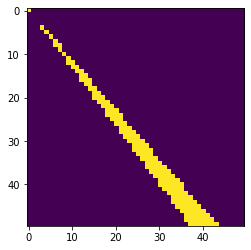

In [1803]:
#visualize beam
array = np.array(arr, dtype=np.uint8)
plt.imshow(array,interpolation='nearest')
plt.show()

#### Part 2

Brute force solution again.  Could have probably sped it up using binary search or another clever approach.

In [1807]:
def send_drone(x,y):        
    drone = ic.intcode_computer(load_data("day19").read())

    #initalize drone
    while drone.getInstruct() != 3:
        drone.run()

    return int(drone.run([x,y]))

In [1808]:
def find_tractor(square_size):
    
    prev_x = 0
    
    for y in range(1040,10000):
        
        #advance forward until at left edge
        while send_drone(prev_x,y) != 1:
            prev_x += 1

        for x in range(prev_x , 10000):
            
            #if top right corner of square is zero
            if send_drone(x + square_size - 1,y) == 0:
                break

            elif send_drone(x,y + square_size - 1) == 0:
                continue
                
            elif send_drone(x + square_size - 1,y + square_size - 1) == 0:
                break
                
            else:
                print("X: " + str(x))
                print("Y: " + str(y))
                return x*10000 + y
        
    

In [1809]:
print("Answer is : " + str(find_tractor(100)))

X: 1308
Y: 1049
Answer is : 13081049


## Day 20-  Donut Maze

#### Part 1

Search over maze to find all portals and create a dictionary to store the coordinates of all portal pairs within the maze.  Once we have those pairs we can use BFS to find the distance needed to travel from the start to the end.

In [1907]:
def find_portals(maze):

    portals = defaultdict(list)
    
    uppercase = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    #scan for portals
    for i in range(1, len(maze) - 1):
        for j in range(1, len(maze[0]) - 1):

            
            if maze[i][j] in uppercase:
                #top portal
                if maze[i-1][j] in uppercase and maze[i+1][j] == '.':
                    portal = maze[i-1][j] + maze[i][j]
                    portals[portal].append((i+1, j))
                    
                #bottom portal:
                elif maze[i+1][j] in uppercase and maze[i-1][j] == '.':
                    portal = maze[i][j] + maze[i+1][j]
                    portals[portal].append((i-1, j))
                    
                #left portal:
                elif maze[i][j-1] in uppercase and maze[i][j+1] == '.':
                    portal = maze[i][j-1] + maze[i][j]
                    portals[portal].append((i, j + 1))
                    
                #right portal:
                elif maze[i][j+1] in uppercase and maze[i][j-1] == '.':
                    portal = maze[i][j] + maze[i][j + 1]
                    portals[portal].append((i, j - 1))
                    
    start = portals['AA'][0]
    end = portals['ZZ'][0]
    
    swaps = {}
    
    for portal in portals:
        if portal != 'AA' and portal != 'ZZ':
            swaps[portals[portal][0]], swaps[portals[portal][1]] = portals[portal][1], portals[portal][0]
    
    return [start, end, swaps, portals]

In [1986]:
def bfs(start, target, swaps, maze):
    visited = set()
    
    stack = [[start, 0]]
    
    while stack:
        #print(stack)
        
        loc, steps = stack.pop(0)
        
        if loc not in visited:
            visited.add(loc)
        
        else:
            continue
            
        if loc == target:
            return steps
        
        x, y = loc
        
        neighbours = [(x+1,y), (x-1,y),(x,y+1),(x,y-1)]
        
        for n in neighbours:
            if n not in visited and maze[n[0]][n[1]] == ".":
                stack.append([n, steps + 1])
                
        if loc in swaps:
            if swaps[loc] not in visited:
                stack.append([swaps[loc], steps + 1])
                    
    return -1

In [1987]:
def solve_maze(data):
    print("loading...")
    maze = data.split("\n")[:-1]
    maze = [list(i) for i in maze]
    
    print('find portals...')
    portals = find_portals(maze)
    
    print('solving..')
    return bfs(portals[0], portals[1], portals[2], maze)

In [1988]:
assert solve_maze(load_data("day20test").read()) == 58
print("Number of steps is: " + str(solve_maze(load_data("day20").read())))

loading...
find portals...
solving..
loading...
find portals...
solving..
Number of steps is: 490


#### Part 2

Slight modification to add a third dimension Z to track in the BFS.  The Z dimension represents how many levels deep the search has travelled.

In [2121]:
def bfs_recurse(start, target, swaps, maze):
    visited = set()
    
    start = (start[0], start[1], 0)
    target = (target[0], target[1], 0)
    
    stack = [[start, 0]]
    
    while stack:
        #print(stack)
        
        loc, steps = stack.pop(0)
        swap_key = (loc[0], loc[1])
        
        #add to visited
        if loc not in visited:
            visited.add(loc)
        
        #if already visited move on
        else:
            continue
        
        #if target found
        if loc == target:
            return steps
        
        
        x, y, z = loc
        
        neighbours = [(x+1,y, z), (x-1,y, z),(x,y+1, z),(x,y-1, z)]
        
        for n in neighbours:
            if n not in visited and maze[n[0]][n[1]] == ".":
                stack.append([n, steps + 1])
            
        #if location has a portal
        if swap_key in swaps:

            #if an outer portal
            if loc[0] == 2 or loc[0] == len(maze) - 3 or loc[1] == 2 or loc[1] == len(maze[0]) - 3:
                
                #if not already visited, visit and decrement depth
                if (swaps[swap_key][0], swaps[swap_key][1], z - 1) not in visited and z != 0:
                    stack.append([(swaps[swap_key][0], swaps[swap_key][1], z - 1), steps + 1])

            #if an inner portal
            if loc[0] != 2 and loc[0] != len(maze) - 3 and loc[1] != 2 and loc[1] != len(maze[0]) - 3:
                
                #if not already visited and inner portal visit and increment depth
                if (swaps[swap_key][0], swaps[swap_key][1], z + 1) not in visited:
                    stack.append([(swaps[swap_key][0], swaps[swap_key][1], z + 1), steps + 1])
    return -1

In [2122]:
def solve_maze_recurse(data):
    print("loading...")
    maze = data.split("\n")[:-1]
    maze = [list(i) for i in maze]
    
    print('find portals...')
    portals = find_portals(maze)
    
    print('solving..')
    return bfs_recurse(portals[0], portals[1], portals[2], maze)

In [2123]:
assert solve_maze_recurse(load_data("day20test2").read()) == 396

print("Number of steps is : " + str(solve_maze_recurse(load_data("day20").read())))

loading...
find portals...
solving..
loading...
find portals...
solving..
Number of steps is : 5648


## Day 21-  Springdroid Adventure

#### Part 1

Part one and two a pretty straight forward.  The trick was figuring out the springdroid script program via manual iteration to figure out how to traverse the path.

In [2124]:
def convert_ascii(program):
    a_prog = []
    
    for line in program:
        for c in line:
            a_prog.append(ord(c))
            
        a_prog.append(ord('\n'))
        
    return a_prog

In [2125]:
springdroid = ic.intcode_computer(load_data("day21").read())
#['NOT D J', 'WALK']
droid_program = convert_ascii(['NOT C T',
                               'AND D T',
                               'OR T J',
                               'NOT B T',
                               'AND D T',
                               'OR T J',
                               'NOT A T',
                               'AND D T',
                               'OR T J',
                               'WALK'])
output = []

#input program
droid_out = springdroid.run(droid_program)

if droid_out:
    output.append(chr(int(droid_out)))

print(output)

while springdroid.getInstruct() != 99:
    droid_out = springdroid.run(droid_program)

    if droid_out != None and droid_out != '':
        if int(droid_out) < 129:
            output.append(chr(int(droid_out)))
        
        else:
            print("Output out of ascii range: " + droid_out)


['I']
Output out of ascii range: 19357761


In [2126]:
''.join(output).split('\n')

['Input instructions:', '', 'Walking...', '', '']

#### Part 2

In [2127]:
springdroid = ic.intcode_computer(load_data("day21").read())
#['NOT D J', 'WALK']
droid_program = convert_ascii(['NOT C T',
                               'AND D T',
                               'AND H T',
                               'OR T J',
                               'NOT B T',
                               'AND D T',
                               'AND H T',
                               'OR T J',
                               'NOT A T',
                               'OR T J',
                               'RUN'])
output = []

#input program
droid_out = springdroid.run(droid_program)

if droid_out:
    output.append(chr(int(droid_out)))

print(output)

while springdroid.getInstruct() != 99:
    droid_out = springdroid.run(droid_program)

    if droid_out != None and droid_out != '':
        if int(droid_out) < 129:
            output.append(chr(int(droid_out)))
        
        else:
            print("Output out of ascii range: " + droid_out)

['I']
Output out of ascii range: 1142249706


## Day 22-  Slam Shuffle

#### Part 1

Created a space cards class and perform operations on the deck per the input.

In [2136]:
class space_cards(object):
    def __init__(self, size):
        self.deck = [i for i in range(size)]
    
    def deal_new_stack(self):
        self.deck = self.deck[::-1]
        return
    
    def print_deck(self):
        
        return self.deck
    
    def cut_deck(self, N):
        self.deck = self.deck[N:] + self.deck[:N]
        return
    
    def deal_increment(self, increment):
        cards = len(self.deck)
        new_deck = [0 for _ in range(cards)]
        
        new_ptr = 0
        
        for card in self.deck:
            new_deck[ new_ptr % cards] = card
            new_ptr += increment
        
        self.deck = new_deck
        return

In [2137]:
def run_deck(file, deck):

    instructions = load_data(file).read().split('\n')

    while instructions:
        instr = instructions.pop(0)

        if instr == 'deal into new stack':
            deck.deal_new_stack()

        elif instr[:3] == 'cut':
            N = int(instr.split(" ")[-1])
            deck.cut_deck(N)

        elif instr[:4] == 'deal':
            N = int(instr.split(" ")[-1])
            deck.deal_increment(N)
            
    return deck.print_deck()

In [2138]:
assert run_deck('day22test', space_cards(10)) == [9, 2, 5, 8, 1, 4, 7, 0, 3, 6]
assert run_deck('day22test1', space_cards(10)) == [0, 3, 6, 9, 2, 5, 8, 1, 4, 7]
assert run_deck('day22test2', space_cards(10)) == [3, 0, 7, 4, 1, 8, 5, 2, 9, 6]
assert run_deck('day22test3', space_cards(10)) == [6, 3, 0, 7, 4, 1, 8, 5, 2, 9]

In [2135]:
print("Card 2019 is located at: " + str(run_deck('day22', space_cards(10007)).index(2019)))

Card 2019 is located at: 6638


#### Part 2

The size of the deck and the number of operations makes the approach from part one unfeasible.  This one was tough and only solved with a lot of help at: https://www.reddit.com/r/adventofcode/comments/ee0rqi/2019_day_22_solutions/

The card values can be expressed as a linear equation: y = mx + b

Where y is the card value at index x.  For an initial deck which starts at 0 and increments by one at each index ( ie  [1,2,3,4] ) b = 0 and m = 1.

Each of the operations changes the value of b and m.  After each operator we would mod m and b by the length of the deck.

##### 'deal into new stack'

This operation reverses the order of the deck.  Which impacts m and b as:

m *= -1

b += m 

##### 'cut N'

This operation changes the start order of the count.  Which impacts m and b as:

b += m * N

##### 'To deal with increment N'

Multiply m by the modular inverse of the increment by the size of the deck. 

m *= power(N, deck_size - 2, deck_size) 

We can use the above formulas to determine the coefficients after one shuffle cycle.  To determine after n cycles:

m_final = (m ^ n) % deck_size

b_final = b * (1 - final_m) * pow((1 - m) % deck_size, deck_size -2 , deck_size)

In [2168]:
def calc_coeff(file, size):

    instructions = load_data(file).read().split('\n')
    
    m = 1
    b = 0

    while instructions:
        instr = instructions.pop(0)

        if instr == 'deal into new stack':
            m *= -1
            m %= size
            
            b += m
            b %= size

        elif instr[:3] == 'cut':
            N = int(instr.split(" ")[-1])
            
            b += m * N
            b %= size

        elif instr[:4] == 'deal':
            N = int(instr.split(" ")[-1])
            
            m *= pow(N, size - 2, size)
            m %= size
            
    return [m, b]

In [2169]:
size = 119315717514047
iterations = 101741582076661

coeffs  = calc_coeff('day22', size)

final_m = pow(coeffs[0], iterations, size)
final_b = coeffs[1] * (1 - final_m) * pow((1 - coeffs[0]) % size, size -2 , size)

final_b %= size

In [2170]:
#Get value at index 2020
ans = (final_m * 2020 + final_b) % size
print("Value at index 2020: " + str(ans))

Value at index 2020: 77863024474406


## Day 23-  Category Six

#### Part 1 & 2

Create an array of 50 computers.  Store a packet queue for each computer in a dictionary.  As we iterate through pass each computer it's queue and update the other queues with any packets the computer sends out.

In [2171]:
computers = []
queue = defaultdict(list)

nat = [-1,-1]
nat_prev_y = -float('Inf')

for _ in range(50):
    computer = ic.intcode_computer(load_data("day23").read())
    
    while computer.getInstruct() != 3:
        computer.run()
    
    computers.append(computer)
    
#initalize each computer
for i in range(50):
    output = computers[i].run([i])
    
#run the network
search = True

while search:

    #cycle through computers
    for i in range(50):
        

        #send input to computer
        while computers[i].getInstruct() == 3:

            if queue[i]:
                output = int(computers[i].run([queue[i].pop(0)]))
            else:
                output = int(computers[i].run([-1]))
                break

        #get outputs
        if output != -1:
            outputs = [output]

            while computers[i].getInstruct() != 3 and computers[i].getInstruct() != 99:
                output = int(computers[i].run())

                if output != -1:
                    outputs.append(output)

            #update queue
            for j in range(0, len(outputs) - 1, 3):
                if outputs[j] == 255:
                    nat[0] = outputs[j + 1]
                    nat[1] = outputs[j + 2]
                
                else:
                    queue[outputs[j]].append(outputs[j + 1])
                    queue[outputs[j]].append(outputs[j + 2])
                
    #check if queue is empty send NAT packet to computer 0
    if all(value == [] for value in queue.values()) and all(c.getInstruct() == 3 for c in computers):
        print("NAT Packet Sent: " + str(nat))
        if nat[1] == nat_prev_y:
            print(str(nat_prev_y) + " sent twice in a row")
            search = False
            
        queue[0].append(nat[0])
        queue[0].append(nat[1])
        
        nat_prev_y = nat[1]        

NAT Packet Sent: [67789, 22659]
NAT Packet Sent: [67789, 21233]
NAT Packet Sent: [67789, 20146]
NAT Packet Sent: [67789, 19350]
NAT Packet Sent: [67789, 18780]
NAT Packet Sent: [67789, 18377]
NAT Packet Sent: [67789, 18093]
NAT Packet Sent: [67789, 17894]
NAT Packet Sent: [67789, 17754]
NAT Packet Sent: [67789, 17656]
NAT Packet Sent: [67789, 17587]
NAT Packet Sent: [67789, 17539]
NAT Packet Sent: [67789, 17506]
NAT Packet Sent: [67789, 17482]
NAT Packet Sent: [67789, 17466]
NAT Packet Sent: [67789, 17454]
NAT Packet Sent: [67789, 17446]
NAT Packet Sent: [67789, 17440]
NAT Packet Sent: [67789, 17436]
NAT Packet Sent: [67789, 17433]
NAT Packet Sent: [67789, 17431]
NAT Packet Sent: [67789, 17430]
NAT Packet Sent: [67789, 17429]
NAT Packet Sent: [67789, 17429]
17429 sent twice in a row


## Day 24-  Planet of Discord

#### Part 1

Iterate through each location in the array and update according to the rules.

In [2177]:
def life(bug_map):
    
    if not bug_map:
        return None
    
    m = len(bug_map)
    n = len (bug_map[0])
    
    new_map = [['.' for _ in range(n)] for _ in range(m)]
    
    for i in range(m):
        for j in range(n):
            
            #calculate number of neighbours with bugs
            neighbours = [[i+1,j], [i-1,j], [i, j+1], [i, j - 1]]
            bugs = 0
            
            for neighbour in neighbours:
                x,y = neighbour
                
                if  0 <= x and x < m and 0 <= y and y < n:
                    if bug_map[x][y] == '#':
                        bugs += 1
                        
            if bug_map[i][j] == '#' and bugs == 1:
                new_map[i][j] = '#'
                
            elif bug_map[i][j] == '.' and bugs < 3 and bugs > 0:
                new_map[i][j] = '#'
                
                
    return new_map

In [2178]:
def create_key(bug_map):
    return ''.join([''.join(i) for i in bug_map])

In [2179]:
def biodiversity(bug_map):
    m = len(bug_map)
    n = len (bug_map[0])
    
    score = 0
    
    for i in range(m):
        for j in range(n):
            
            if bug_map[i][j] == '#':
                score += 2**(i * (n) + j)
                
    return score

In [2180]:
bug_map = load_data("day24").read().split('\n')[:-1]
bug_map = [list(i) for i in bug_map]

seen_maps = set(create_key(bug_map))

while True:
    bug_map = life(bug_map)
    #print('\n'.join([''.join(i) for i in bug_map]) + '\n')
    
    if create_key(bug_map) in seen_maps:
        break
        
    seen_maps.add(create_key(bug_map))
    
print("Biodiversity score: " + str(biodiversity(bug_map)))

Biodiversity score: 30446641


#### Part 2

Store all the array for all the levels in a 3D array.  First check if the highest or lowest level has started to touch the next recursion level.  If so pad out the levels of the 3d array.

I added a dictionary with coordinates for checking neighbours from different recursion levels.  Once those additional neighbours are defined it's just a matter of updating the game per the rules at each step.

In [2188]:
#check if recursion down needed
def recurse_down(b_map):
    return b_map[1][2] == '#' or b_map[3][2] == '#' or b_map[2][1] == '#' or b_map[2][3] == '#'

In [2282]:
#check if recursion up needed
def recurse_up(b_map):
    
    #top or bottom row
    if '#' in b_map[0] or '#' in b_map[4]:
        return True
    
    #left right edges
    for i in range(len(b_map)):
        if b_map[i][0] == '#' or b_map[i][-1] == '#':
            return True
        
    return False

In [2283]:
def life_recursion(bug_map, c_layer):
    
    neighbours = defaultdict(list)
    
    
    #recurse neighbours
    for i in range(0,5):
        
        ###
        #up
        
        #left edge
        neighbours[(i,0)].append((c_layer + 1,2,1))
        
        #right edge
        neighbours[(i,4)].append((c_layer + 1,2,3))
        
        #top edge
        neighbours[(0,i)].append((c_layer + 1,1,2))
        
        #bottom edge
        neighbours[(4,i)].append((c_layer + 1,3,2))
        
        ###
        #down
        
        #pos 8 and 18
        neighbours[(1,2)].append((c_layer - 1,0,i))
        neighbours[(3,2)].append((c_layer - 1,4,i))
        
        #pos 12 and 14
        neighbours[(2,1)].append((c_layer - 1,i,0))
        neighbours[(2,3)].append((c_layer - 1,i,4))
    
    if not bug_map:
        return None
    
    layers = len(bug_map)
    m = len(bug_map[0])
    n = len (bug_map[0][0])
    
    new_map = [['.' for _ in range(n)] for _ in range(m)]
    new_map[2][2] = '?'
    
    for i in range(m):
        for j in range(n):
            
            #calculate number of neighbours with bugs
            std_neighbours = [(c_layer, i+1,j), (c_layer, i-1,j), (c_layer, i, j+1), (c_layer, i, j - 1)]
            all_neighbours = std_neighbours + neighbours[(i, j)]
            bugs = 0
            
            for neighbour in all_neighbours:
                layer, x, y = neighbour
                
                if  0 <= x and x < m and 0 <= y and y < n and 0 <= layer and layer < layers:
                    if bug_map[layer][x][y] == '#':
                        bugs += 1
                        
            if bug_map[c_layer][i][j] == '#' and bugs == 1:
                new_map[i][j] = '#'
                
            elif bug_map[c_layer][i][j] == '.' and bugs < 3 and bugs > 0:
                new_map[i][j] = '#'
                
                
    return new_map

In [2317]:
def iterate_life(recurse_map, steps):
    
    for i in range(steps):
    
        #check if we need to pad layers
        if recurse_up(recurse_map[-1]):
            recurse_map.append(empty_map[:])

        #check if pad down
        if recurse_down(recurse_map[0]):
            recurse_map.insert(0, empty_map[:])

        new_map = []

        for i in range(len(recurse_map)):
            new_map.append(life_recursion(recurse_map, i))

        recurse_map = new_map[:]
        
    #count bugs
    total_bugs = 0
    for layer in range(len(recurse_map)):
        for i in range(len(recurse_map[0])):
            for j in range(len(recurse_map[0][0])):

                if recurse_map[layer][i][j] == '#':
                    total_bugs += 1
                    
    return total_bugs

In [2318]:
empty_map = [['.' for _ in range(5)] for _ in range(5)]
empty_map[2][2] ='?'

bug_map = load_data("day24").read().split('\n')[:-1]
bug_map = [list(i) for i in bug_map]
bug_map[2][2] = '?'

recurse_map = [bug_map]

In [2319]:
print("Total bugs found: " + str(iterate_life(recurse_map, 200)))

Total bugs found: 1985


## Day 25-  Cryostasis

#### Part 1

No clever code here.  Just manually playing the game until the solution was found.

The final set of items was: space heater, semiconductor, festive hat, and hypercube

In [2374]:
droid = ic.intcode_computer(load_data("day25").read())

In [2375]:
output_queue = []

while True:


    while droid.getInstruct() != 3 and droid.getInstruct() != 99:
        output = droid.run()

        if output != None and output != -1:
            output_queue.append(chr(int(output)))

    print(''.join(output_queue))
    
    user = input()
    
    if user == 'exit':
        break
        
    user = [ord(i) for i in user]
    user.append(10)
    
    output_queue = [droid.run(user)]




== Hull Breach ==
You got in through a hole in the floor here. To keep your ship from also freezing, the hole has been sealed.

Doors here lead:
- north
- east
- south

Command?

exit
